*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/notebooks/module01_04_vectors_dot_products.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


In [8]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

In [4]:
from matplotlib.ticker import MaxNLocator
def axes_at_zero(ax):
    """helper to make the axes go through (0,0)"""
    ax.spines['left'].set_position(('data', 0.0))
    ax.spines['bottom'].set_position(('data', 0.0))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_aspect('equal')
    


In [29]:
def plot_vector(vector, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector[0], vector[1],
              head_width=0.1, head_length=0.2, length_includes_head=True,
              **options)

# Vectors, Geometry, and Dot Products

Vectors are the fundamental building blocks of machine learning data, so we need to understand them well.

## Vectors and their geometry

In math, a vector is written as a *column* of values:
$$
\mathbf{v} = \begin{pmatrix}1\\7\\0\\1\end{pmatrix}.
$$

It can also be expressed as the transpose of a *row* vector:

$$
\mathbf{v}^\top = \begin{pmatrix}1 & 7 & 0 & 1\end{pmatrix}.
$$ 

In Python you can represent a vector using a Python list:

In [ ]:
v = [1, 7, 0, 1]

Numpy arrays will be a more useful way:

In [ ]:
v = np.array([1, 7, 0, 1])
v

There is more to a vector than an array of numbers:  a vector can be interpreted as a point in space, or as a direction.

### Vectors as points in space

A vector can be seen as a **point in space**:
its components to define a location in space relative to a fixed reference called the *origin*.  
In two or three dimensions, we can visualize this:

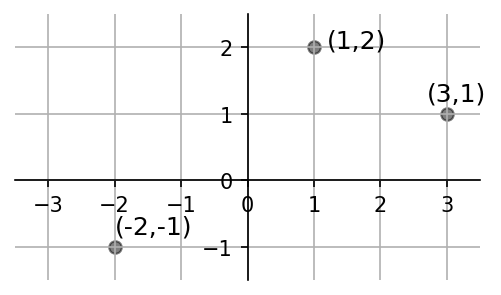

In [26]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)
plt.scatter(1,2, c='k', alpha=0.5);
plt.text(1.2,2, '(1,2)', fontsize = 12)
plt.scatter(3,1, c='k', alpha=0.5);
plt.text(2.7,1.2, '(3,1)', fontsize = 12)
plt.scatter(-2,-1, c='k', alpha=0.5);
plt.text(-2,-0.8, '(-2,-1)', fontsize = 12)
plt.ylim(-1.5,2.5);
plt.xlim(-3.5,3.5);
axes_at_zero(ax)
plt.grid()

This geometric point of view allows us to consider the problem of data classification on a more abstract level.
Let's consider for example the problem of classifying images, say distinguishing between cats and dogs.  However, when we interpret the images as simply points in space, 
the problem becomes no different than other classification problems (although images do benefit from classification methods that build on the characteristics of this domain).  On this more abstract level, we seek to discover how to separate two groups of points.

### Vectors as directions

There is a second point of view of vectors: as **directions** in space. 
In this way, we consider all the vectors in the figure below as being the same.

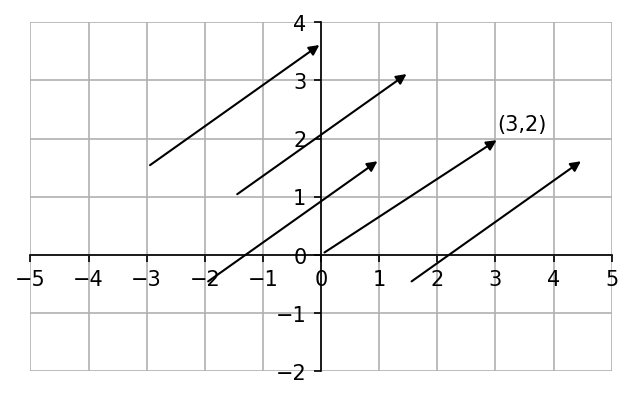

In [18]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.annotate("(3,2)", xy =(0,0), xytext=(3.03,2.15), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(1.5,-0.5), xytext=(4.53,1.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-2,-0.5), xytext=(1.03,1.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-1.5,1), xytext=(1.53,3.15), arrowprops=dict(facecolor='black', arrowstyle='<|-'));
plt.annotate("", xy =(-3,1.5), xytext=(0.03,3.65), arrowprops=dict(facecolor='black', arrowstyle='<|-'));

plt.ylim(-2,4);
plt.xlim(-5,5);
axes_at_zero(ax)
plt.grid()

## Operations on vectors

### Vector addition

Vectors of same size can be added together. Addition is performed *elementwise*:


In [7]:
u = np.array([2, 5])
v = np.array([3, 1])

print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Keep in mind that the `+` operator for Python lists does something else altogether!

The geometric view of vectors helps us make visual sense of vector addition: we follow the direction given by one vector, and then follow the direction given by the other:

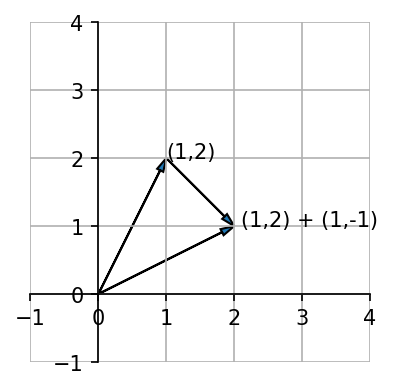

In [15]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)

u = np.array([1, 2])
v = np.array([1, -1])

plot_vector(u)
plot_vector(v, origin=u)
plot_vector(u+v)

plt.text(1,2, "(1,2)");
plt.text(2.1,1, "(1,2) + (1,-1)")

plt.ylim(-1,4);
plt.xlim(-1,4);
plt.grid()
axes_at_zero(ax)


This geometric perspective also demonstrates that vector addition is commutative, i.e. the order in which you add vectors does not matter:

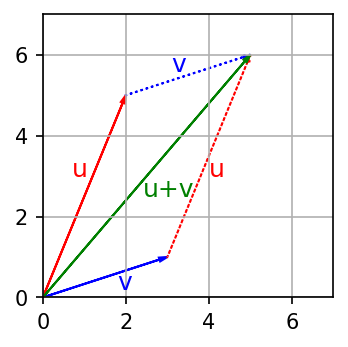

In [10]:
u = np.array([2, 5])
v = np.array([3, 1])

plt.figure(figsize=(2.5,2.5))

plot_vector(u, color="r")
plot_vector(v, color="b")
plot_vector(v, origin=u, color="b", linestyle="dotted")
plot_vector(u, origin=v, color="r", linestyle="dotted")
plot_vector(u+v, color="g")

plt.axis([0, 7, 0, 7])
plt.text(0.7, 3, "u", color="r", fontsize=12)
plt.text(4, 3, "u", color="r", fontsize=12)
plt.text(1.8, 0.2, "v", color="b", fontsize=12)
plt.text(3.1, 5.6, "v", color="b", fontsize=12)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=12)
plt.grid()

### Exercise:

* Given a vector $\mathbf{v}$, what is the direction given by $-\mathbf{v}$?

Vector subtraction has a similar interpretation that follows from the following identity:

$$ \mathbf{u} - \mathbf{v} = \mathbf{u} + (\mathbf{-v}) $$

By considering the identity that $\mathbf{u} = \mathbf{v} + (\mathbf{u}-\mathbf{v})$,
we see that the vector $\mathbf{u}-\mathbf{v}$ is the direction 
that takes us from the point $\mathbf{u}$ to the point $\mathbf{v}$.

### Multiplication by a scalar

A vector can be multiplied by a scalar (i.e. number).  The result is a vector where all elements of the vector are multiplied by that number.
Here's an example of that in Numpy:

In [28]:
u = np.array([2, 5])

number = 1.5
print(number, " * ", u, "=")

number * u

1.5  *  [2 5] =


array([3. , 7.5])

Let's get an intuition of what scalar multiplication does:

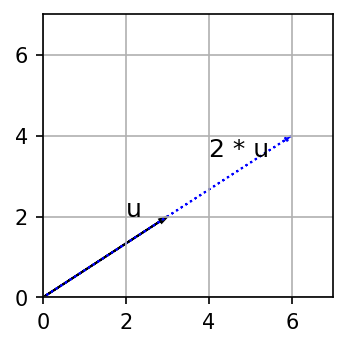

In [12]:
u = np.array([3, 2])
a = 2

plt.figure(figsize=(2.5,2.5))

plot_vector(u)
plot_vector(a * u, color="b", linestyle="dotted")
plt.text(2, 2, "u", color="k", fontsize=12)
plt.text(4, 3.5, str(a)+ " * u", color="k", fontsize=12)
plt.axis([0, 7, 0, 7])
plt.grid()

* Looking at this figure, what can you say about the direction defined by a vector $\mathbf{u}$ and $a \cdot \mathbf{u}$, where $a \in\mathbb{R}$?

## The norm of a vector

The length of a vector in two dimensions $\mathbf{v} = (v_1, v_2)^\top$ is given by $\sqrt{v_1^2 + v_2^2}$.  This is a simple application of the Pythagorean theorem.
For example:

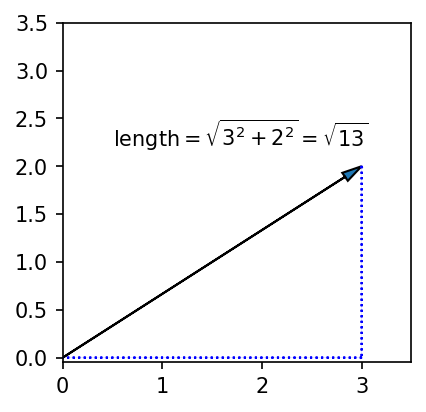

In [28]:
fig=plt.figure(figsize=(3,3))
#plt.grid()
plot_vector((3,2))
plt.ylim(-0.05,3.5);
plt.xlim(0,3.5);
plt.arrow(3,0,0,2, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
plt.arrow(0,0,3,0, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
plt.text(0.5,2.2 , r'$\mathrm{length} = \sqrt{3^2+2^2}=\sqrt{13}$');


For a vector in $d$ dimensions the length or **norm** of a vector is given by:

$$
||\mathbf{v}|| = \sqrt{\sum_{i=1}^d v_i^2},
$$
where $\mathbf{v} = (v_1, v_2,\ldots,v_d)^\top$.

This is such a common operation that Numpy has a special command for it:

In [ ]:
np.linalg.norm(np.array([1,3]))

### Exercise:

* Write pure Python code that verifies that `np.linalg.norm` is giving the expected result.

In [ ]:
def norm(a_list) :
    """
    Compute the norm of the given vector, provided as a python list
    """
    return 0

norm([1,3])

### Unit vectors

A vector with a norm equal to 1 is called a **unit vector**.

Given a vector $\mathbf{u}$ it is easy to make it into a unit vector by dividing by its norm:

$$
\hat{\mathbf{u}} = \frac{\mathbf{u}}{||\mathbf{u}||}
$$

This operation is called *normalization*.  It produces a vector that points in the same direction of the original vector.

From our discussion above, we now know that a unit vector captures the direction a vector points at.

In fact, any vector can be represented as:

$$
\mathbf{u} = ||\mathbf{u}|| \hat{\mathbf{u}},
$$

where $\hat{\mathbf{u}}$ is a unit vector in the direction of $\mathbf{u}$.  In other words, a vector is determined by its direction, and length.
Or in other words, think of a vector as a direction, and the size of the step to take in that direction.


### Exercise:

* Write code for converting a vector to a unit vector.  Verify graphically that you obtained the expected result.

In [35]:
def normalize(vector):
    return vector

# plot a vector before/after normalization use the function plot_vector
# shown at the top of the notebook

## The dot product

The **dot product** between two vectors $\mathbf{u}$ and $\mathbf{v}$ is defined as:

$$\mathbf{u}^\top\mathbf{v} = \sum_i u_i v_i.$$

The dot product is often represented using the *dot* operator as $\mathbf{u}\cdot\mathbf{v}$.

We note that the dot product is symmetric, i.e. does not depend on the order of its operands:

$$
\mathbf{u}^\top\mathbf{v} = \mathbf{v}^\top\mathbf{u}.
$$

You can compute the dot product using Numpy:

In [ ]:
u = np.array([1, 0, 1])
v = np.array([0, -1, 2])
np.dot(u,v)

The `dot` function can be invoked as a method or using the `@` operator:

In [ ]:
print(u.dot(v), u @ v)

And to round things off, here's a pure Python implementation:

In [ ]:
u = [1, 0, 1]
v = [0, -1, 2]
sum(a*b for a,b in zip(u,v))

### Exercise

* We have already seen how the `*` operator functions between a scalar and a vector in Numpy.  It also works between vectors.  However, the vectors need to be of the same size.

In [ ]:
## define two one-dimensional numpy arrays of the same size and 
## check what is the result of multiplying them using the * operator

### Geometric interpretation of the dot product

The dot product also admits a geometric interpretation: it is closely related to the angle between two vectors.

We'll start by considering the dot product between two unit vectors in two dimensions.

We'll show that the dot product of two unit vectors is equal to the cosine of the angle between them.
To demonstrate that, let us consider:

$$
\hat{\mathbf{u}} = [1,0]^\top \; \text{and} \; \hat{\mathbf{v}} = [\cos(\theta), \sin(\theta)]^\top.
$$

The vector $\hat{\mathbf{u}}$ is parallel to the $x$-axis, 
and $\hat{\mathbf{v}}$ is at an angle $\theta$ with respect to the $x$-axis.

We can easily compute the dot product between these vectors:

$$
\hat{\mathbf{u}}^\top \hat{\mathbf{v}} = \cos(\theta)
$$

Now, as we have seen above, every vector $\mathbf{u}$ can be expressed as:

$$
\mathbf{u} = ||\mathbf{u}|| \hat{\mathbf{u}},
$$

where $\hat{\mathbf{u}}$ is a unit vector in the direction of $\mathbf{u}$.  

Using this property, we can now compute the dot product between any two vectors in two dimensions as:

$$
\mathbf{u}^\top \mathbf{v} = ||\mathbf{u}|| \; ||\mathbf{v}|| \;\hat{\mathbf{u}}^\top \hat{\mathbf{v}} = ||\mathbf{u}|| \; ||\mathbf{v}|| \cos(\theta)
$$

This fact is true in [general](https://en.wikipedia.org/wiki/Dot_product), i.e. for vectors in any dimension and orientation.

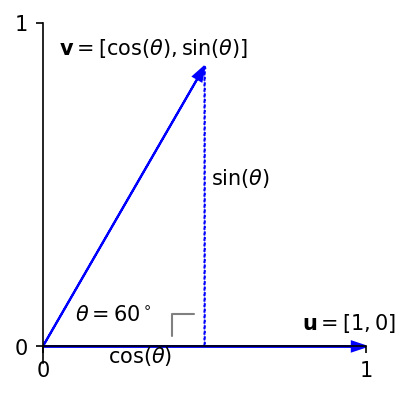

In [20]:
#plt.xkcd(scale=0., randomness=2)
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(111)
ax.arrow(0,0,0.5,0.866, width=0.001, head_width=0.03, length_includes_head=True, alpha=1, linestyle='-',color='b');
plt.ylim(-0.05,1);
plt.xlim(0,1);
ax.arrow(0,0,1,0, width=0.001, head_width=0.03, length_includes_head=True, alpha=1, linestyle='-',color='b');
ax.arrow(0.5,0,0,0.866, width=0.001,length_includes_head=True, alpha=1,linestyle=':',color='b');
ax.text(0.8, 0.05, r'$\mathbf{u}=[1,0]$')
ax.text(0.05, 0.9, r'$\mathbf{v}=[\cos(\theta), \sin(\theta)]$')
plt.text(0.1,0.08 , r'$\theta = 60^\circ$');
plt.text(0.52, 0.5, r'$\sin(\theta)$');
plt.text(0.2, -0.05, r'$\cos(\theta)$');

ax.annotate("", xy=(0.4, 0), xycoords='data', xytext=(0.5, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="-", color="0.5", shrinkA=5, shrinkB=5, patchA=None, patchB=None, connectionstyle="angle,angleA=0,angleB=90,rad=0"))
axes_at_zero(ax)

### Orthogonality

Vectors for which the dot product is equal to zero are called **orthogonal**.

### Questions

* What is the angle between orthogonal vectors?

* What can you say about the angle between vectors that have positive coefficients?

* Express the norm of a vector as a dot product.

To help you with this here's a plot of the sine and cosine functions:

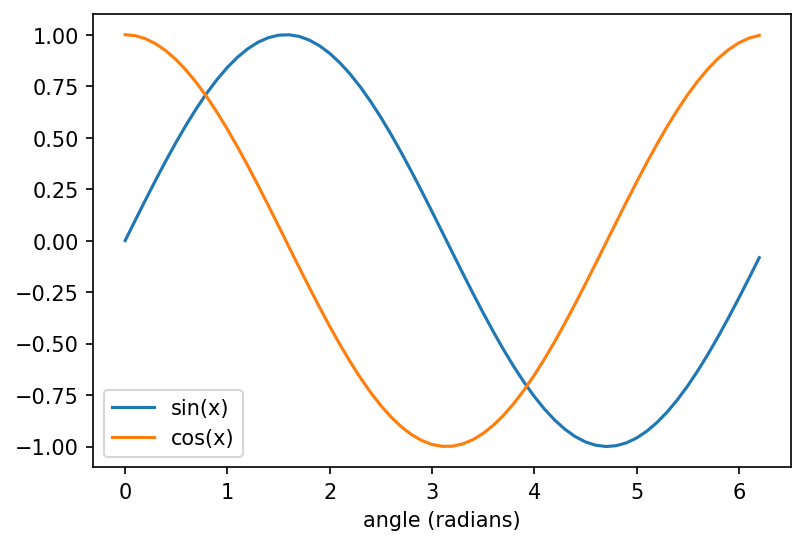

In [18]:
x = np.arange(0,2*np.pi,0.1)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y,x,z)
plt.xlabel('angle (radians)')
plt.legend(['sin(x)', 'cos(x)']);


### Cosine similarity

In machine learning the cosine of the angle between two vectors is a common way to express their similarity

$$
\cos(\theta) = \frac{\mathbf{v}^\top \mathbf{w}}{\|\mathbf{v}\|\|\mathbf{w}\|}.
$$

The cosine takes a maximum value of $1$ 
when the two vectors point in the same direction, is equal to
$-1$ when they point in opposite directions,
and takes on the value of $0$ when the two vectors are orthogonal.
Note that if the components of high-dimensional vectors
are sampled randomly with mean $0$,
their cosine will nearly always be close to $0$.

### Exercise

* Use Numpy to write code that computes the cosine between two vectors with an arbitrary number of dimensions.
Use your code to compute the angle between

$$
\mathbf{u} = \begin{pmatrix}
1 \\ 0 \\ -1 \\ 2
\end{pmatrix}, \qquad  \mathbf{v} = \begin{pmatrix}
3 \\ 1 \\ 0 \\ 1
\end{pmatrix}
$$

In [ ]:
def cosine(u, v) :
    return 0

## Summary

* Vectors can be interpreted geometrically as either points or directions in space.
* Dot products define the notion of angle between vectors of arbitrary dimensions.

